# **Autoencoder**

In [6]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
import os

#from __future__ import print_function

In [7]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# plt.imshow(x_train[0].reshape(28,28))

In [10]:
from keras.layers import Input, Dense
from keras.models import Model
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats (28X28 digits)
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.fit(x_train, x_train,
 epochs=20,
 batch_size=256,
 shuffle=True,
 validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 4s 14ms/step - loss: 0.2784 - val_loss: 0.1930
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1738 - val_loss: 0.1558
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1459 - val_loss: 0.1347
Epoch 4/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1296 - val_loss: 0.1224
Epoch 5/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1194 - val_loss: 0.1141
Epoch 6/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1124 - val_loss: 0.1083
Epoch 7/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1072 - val_loss: 0.1036
Epoch 8/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1033 - val_loss: 0.1006
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.1003 - val_loss: 0.0978
Epoch 10/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0982 - val_lo

In [13]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(encoded_imgs)
encoded_imgs[0].shape

313/313 [==============================] - 1s 2ms/step


(784,)

In [14]:
decoded_imgs[0].shape

(784,)

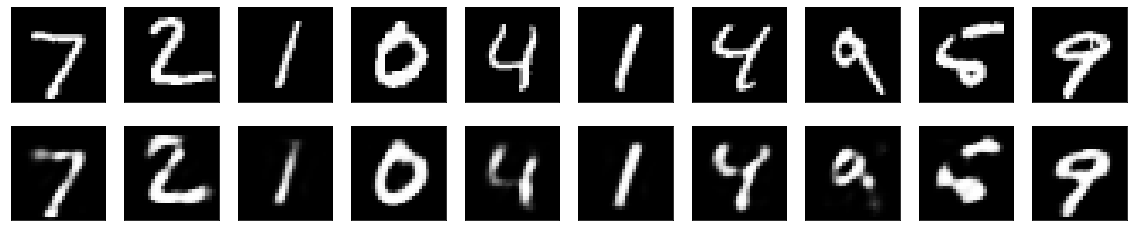

In [15]:
# use Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
 # display original
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
# display reconstruction
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()

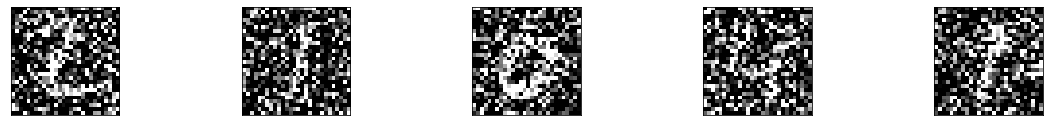

In [16]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [17]:
# from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
# from tensorflow.keras import Model
# pred = model.predict(x_test_noisy)
# plt.figure(figsize=(20, 4))
# for i in range(5):
#     # Display original
#     ax = plt.subplot(2, 5, i + 1)
#     plt.imshow(x_test_noisy[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
#     # Display reconstruction
#     ax = plt.subplot(2, 5, i + 1 + 5)
#     plt.imshow(pred[i].reshape(28, 28))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [18]:

from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [19]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [20]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [21]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


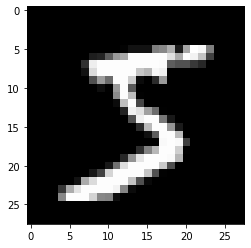

In [23]:
plt.imshow(x_train[0].reshape(28,28))

In [24]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 3s 12ms/step - loss: 0.3119 - val_loss: 0.2253
Epoch 2/15
235/235 [==============================] - 4s 15ms/step - loss: 0.2011 - val_loss: 0.1816
Epoch 3/15
235/235 [==============================] - 3s 14ms/step - loss: 0.1735 - val_loss: 0.1638
Epoch 4/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1597 - val_loss: 0.1540
Epoch 5/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1521 - val_loss: 0.1482
Epoch 6/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1475 - val_loss: 0.1447
Epoch 7/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1447 - val_loss: 0.1424
Epoch 8/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1427 - val_loss: 0.1407
Epoch 9/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1410 - val_loss: 0.1389
Epoch 10/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1395 - val_lo

313/313 [==============================] - 1s 1ms/step


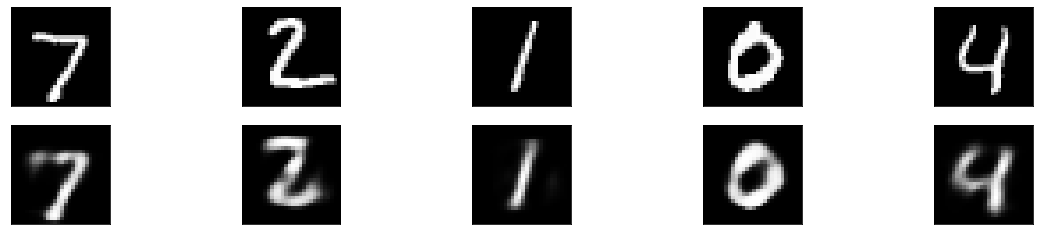

In [25]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
model = Sequential()
# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)       0

In [27]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
model.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 154s 326ms/step - loss: 0.1278 - val_loss: 0.0792
Epoch 2/15
469/469 [==============================] - 154s 328ms/step - loss: 0.0772 - val_loss: 0.0744
Epoch 3/15
469/469 [==============================] - 153s 326ms/step - loss: 0.0742 - val_loss: 0.0726
Epoch 4/15
469/469 [==============================] - 153s 327ms/step - loss: 0.0727 - val_loss: 0.0715
Epoch 5/15
469/469 [==============================] - 162s 345ms/step - loss: 0.0718 - val_loss: 0.0707
Epoch 6/15
469/469 [==============================] - 156s 333ms/step - loss: 0.0710 - val_loss: 0.0700
Epoch 7/15
469/469 [==============================] - 156s 332ms/step - loss: 0.0704 - val_loss: 0.0695
Epoch 8/15
469/469 [==============================] - 155s 330ms/step - loss: 0.0699 - val_loss: 0.0693
Epoch 9/15
469/469 [==============================] - 155s 331ms/step - loss: 0.0695 - val_loss: 0.0687
Epoch 10/15
469/469 [==============================] - 154s 328m

313/313 [==============================] - 7s 24ms/step


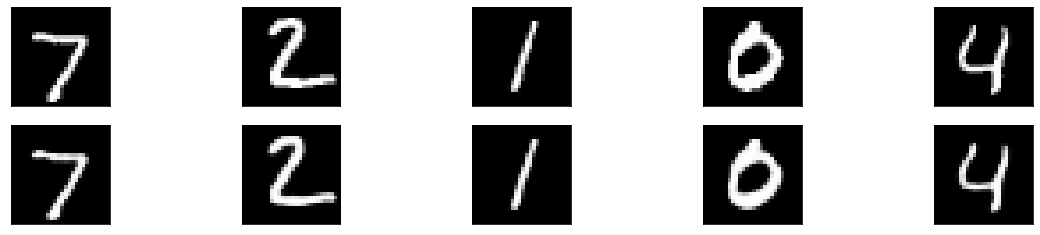

In [28]:
pred = model.predict(x_test)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

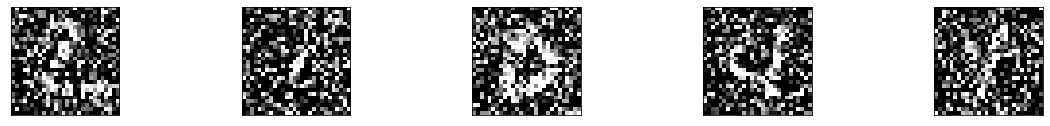

In [29]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
plt.figure(figsize=(20, 2))
for i in range(1, 5 + 1):
    ax = plt.subplot(1, 5, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train,epochs=15,batch_size=128,validation_data=(x_test_noisy, x_test))
model = Sequential()
# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))
#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer
model.compile(optimizer= 'adam', loss = 'binary_crossentropy')
model.fit(x_train_noisy, x_train,
                epochs=15,
                batch_size=128,
                validation_data=(x_test_noisy, x_test))

Epoch 1/15
469/469 [==============================] - 202s 431ms/step - loss: 0.1977 - val_loss: 0.1515
Epoch 2/15
469/469 [==============================] - 201s 429ms/step - loss: 0.1469 - val_loss: 0.1414
Epoch 3/15
469/469 [==============================] - 200s 426ms/step - loss: 0.1395 - val_loss: 0.1356
Epoch 4/15
469/469 [==============================] - 200s 426ms/step - loss: 0.1351 - val_loss: 0.1322
Epoch 5/15
469/469 [==============================] - 201s 428ms/step - loss: 0.1323 - val_loss: 0.1304
Epoch 6/15
469/469 [==============================] - 199s 424ms/step - loss: 0.1307 - val_loss: 0.1284
Epoch 7/15
469/469 [==============================] - 198s 422ms/step - loss: 0.1292 - val_loss: 0.1273
Epoch 8/15
469/469 [==============================] - 198s 422ms/step - loss: 0.1281 - val_loss: 0.1270
Epoch 9/15
469/469 [==============================] - 197s 419ms/step - loss: 0.1272 - val_loss: 0.1256
Epoch 10/15
469/469 [==============================] - 198s 423m

313/313 [==============================] - 8s 26ms/step


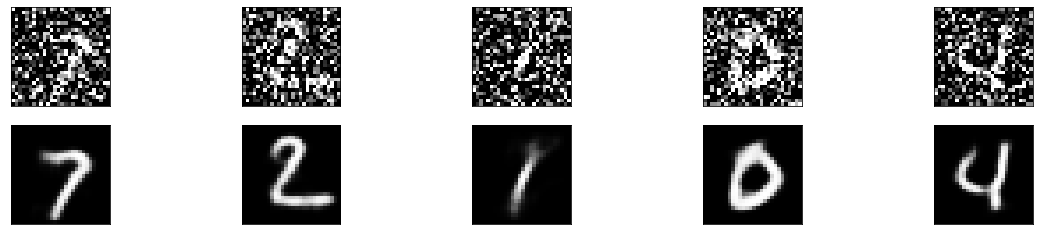

In [31]:
pred = model.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()